# Precision-Recall Monte-Carlo
This notebook explores how the precision-recall curves are affected by different Norbits_instability values. The essence of this notebook is as follows:  
1) Using sim_id = 4002 and 4283 we get a sense of the standard deviation in log(Norbits_instability). We assume that all sim_ids have the same spread in Norbits_Instability.  
2) Randomly generate new Norbits_Instability times for each sim_id by drawing from gaussian distributions, where the mean is the "true" Norbits_Instability time and standard deviation calculated from 1).   
3) If Norbits_Instability < 1e6, then the newly drawn system is classified as unstable, otherwise it is stable.  
4) Generate new precision-recall curves.

* Dealing with Norbits_instability = 10^7 systems: Maybe it goes unstable after 10^9 years, and assuming that the mean of the distribution is 10^7 is thus incorrect. But maybe if we see the slope the rate of how systems go unstable, fit a curve to that, and then extend it, we can draw mean instability times for the systems with Norbits_instability = 10^7.  

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sim_id = 4002
#df = pd.read_csv("/mnt/raid-cita/dtamayo/Stability/data/distribution/outputs"+str(sim_id)+'/distribution'+str(sim_id)+".csv", index_col=0)
df = pd.read_csv("../data/distribution/outputs"+str(sim_id)+'/distributionallfeatures'+str(sim_id)+".csv", index_col=0)
df.tail()

sim_id = 4283
#df2 = pd.read_csv("/mnt/raid-cita/dtamayo/Stability/data/distribution/outputs"+str(sim_id)+'/distribution'+str(sim_id)+".csv", index_col=0)
df2 = pd.read_csv("../data/distribution/outputs"+str(sim_id)+'/distributionallfeatures'+str(sim_id)+".csv", index_col=0)
df2.tail()

,Sim_ID,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,...,max_iH2,max_iH3,min_iH1,min_iH2,min_iH3,mean_std_iH,norm_a1_slope,norm_a2_slope,norm_a3_slope,y_pred
995,995,False,4220479.84880,10000000,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476772,0.476258,0.153493,0.142702,0.114034,0.138363,-5.063991e-10,2.003642e-09,-1.534471e-09,0.020058
996,996,False,2797825.88508,10000000,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476944,0.476258,0.153493,0.142702,0.114034,0.138374,-5.306702e-10,2.054205e-09,-1.556078e-09,0.033983
997,997,False,2938650.13545,10000000,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476783,0.476258,0.153493,0.142702,0.114034,0.138360,-5.011742e-10,1.993703e-09,-1.530899e-09,0.015805
998,998,False,17446105.69250,10000000,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476790,0.476258,0.153493,0.142702,0.114034,0.138359,-4.991493e-10,1.989510e-09,-1.529245e-09,0.016898
999,999,False,2035919.00309,10000000,0.000015,0.021544,0.045652,0.009754,0.013522,1.325028,...,0.476781,0.476258,0.153493,0.142702,0.114034,0.138361,-5.020798e-10,1.995487e-09,-1.531564e-09,0.020058


In [5]:
logs1 = np.log10(df['Norbits_instability'].values)
logs2 = np.log10(df2['Norbits_instability'].values)

0.338423941975 0.458251312576


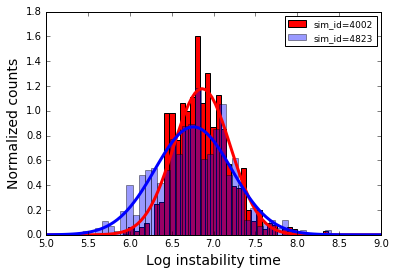

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
mu1, std1 = norm.fit(logs1)
mu2, std2 = norm.fit(logs2)
std_avg = np.mean([std1,std2])
x = np.linspace(5, 9, 100)

fontsize=14
fig, ax = plt.subplots()
ax.hist(logs1, 40, normed=True, label='sim_id=4002', color="red")
ax.hist(logs2, 40, alpha=0.4, normed=True, label='sim_id=4823', color="blue")
ax.plot(x, mlab.normpdf(x, mu1, std1), color="red", lw=3)
ax.plot(x, mlab.normpdf(x, mu2, std2), color="blue", lw=3)
ax.set_xlabel('Log instability time', fontsize=fontsize)
ax.set_ylabel('Normalized counts', fontsize=fontsize)
plt.legend(loc="upper right",fontsize=9)
print(np.std(logs1),np.std(logs2))
plt.savefig("Norbits_Instability_histogram.pdf")

In [78]:
data = pd.read_csv('../data/1e7data_holdout.csv', index_col=0)
data.head()

#change stability to if systems survive > 10^6 years
thresh_stability=6
data.loc[np.log10(data["Norbits_instability"])>=thresh_stability,"Stable"] = True
data.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,norm_min_e2,norm_min_window10_e2,norm_min_e3,norm_min_window10_e3,norm_min_inc1,norm_min_window10_inc1,norm_min_inc2,norm_min_window10_inc2,norm_min_inc3,norm_min_window10_inc3
Sim_ID,,,,,,,,,,,,,,,,,,,,,
1648,True,10000000.000000,10000000,0.000015,0.021544,0.040300,0.008090,0.012516,0.738353,0.010083,...,0.000175,0.007353,0.000124,0.016611,0.002061,0.000299,0.000081,0.000301,0.001068,0.001251
3471,False,823367.719786,10000000,0.000015,0.021544,0.046764,0.010113,0.015860,1.880579,0.012391,...,0.000101,0.004332,0.000179,0.015675,0.000293,0.000242,0.000046,0.000635,0.000009,0.000270
3849,False,7204.145390,10000000,0.000015,0.021544,0.042360,0.008718,0.014634,-0.601227,0.009680,...,0.000188,0.041751,0.000054,0.036828,0.000012,0.006989,0.000762,0.002772,0.000394,0.001563
3537,False,5851.915123,10000000,0.000015,0.021544,0.053215,0.012276,0.016287,-3.618376,0.012772,...,0.000703,0.091574,0.000048,0.015606,0.000246,0.004709,0.000930,0.008343,0.000694,0.000366
4214,True,6435885.051550,10000000,0.000015,0.021544,0.054681,0.012787,0.012152,2.292604,0.009484,...,0.000277,0.065076,0.000003,0.018345,0.000280,0.000247,0.000108,0.009791,0.001519,0.002027


Below is the routine to monte-carlo the samples and calculate precision-recall distributions.

In [79]:
def PR_MC(data, std_avg, thresh_stability, sigma_threshold, N_samples):
    precision = np.zeros(N_samples)
    recall = np.zeros(N_samples)
    
    #fig, ax = plt.subplots()
    for i in range(N_samples):
        #Monte-Carlo
        data["sample_log_NorbInsta"] = np.random.normal(loc=np.log10(data["Norbits_instability"]), scale=std_avg)
        data["predstable"] = np.log10(data["Norbits_instability"]) + sigma_threshold*std_avg > 6
        data["truestable"] = data["sample_log_NorbInsta"] > 6
        #ax.hist(data["sample_log_NorbInsta"], 40, alpha=0.3, label="");
        
        #pos = postive result, i.e. Stable. 
        true_pos_and_pos_classify = data[(data["truestable"]==1)&(data["predstable"]==1)].shape[0]
        total_true_pos = data[data["truestable"]==1].shape[0]
        pos_classify = data[data["predstable"]==1].shape[0]
        try:
            precision[i] = true_pos_and_pos_classify/float(pos_classify)
        except:
            precision[i] = 1.
        recall[i] = true_pos_and_pos_classify/float(total_true_pos)
    
    #ax.hist(np.log10(data["Norbits_instability"]), 40, alpha=0.3, label="original dist");
    #plt.legend(loc="upper left")
    #ax.set_title("Difference between MC samples and original")
    #ax.set_xlabel("log10(Norbits_instability)")
    #plt.savefig("precision-recall_MC_sample-dist.pdf")
    return precision.mean(), recall.mean(), data

In [92]:
%%time
N_samples = 1000
precision2, recall2, data2 = PR_MC(data,1.5*std_avg,thresh_stability,-0.25,N_samples)
print(precision2, recall2)

0.899779053085 0.856780908702
CPU times: user 3.53 s, sys: 45.4 ms, total: 3.58 s
Wall time: 3.58 s


In [58]:
np.savetxt('../data/thresholdsOP.txt', thresholds)
np.savetxt('../data/recallOP.txt', recall)
np.savetxt('../data/precisionOP.txt', precision)

In [56]:
Npts = 1000
thresholds = np.linspace(-3, 3, Npts)
precision, recall = np.zeros(Npts), np.zeros(Npts)
for i, threshold in enumerate(thresholds):
    precision[i], recall[i], data = PR_MC(data,std_avg,thresh_stability,threshold,N_samples)

In [57]:
precision

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

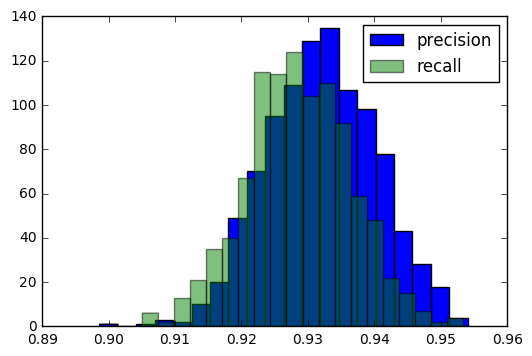

In [13]:
fig, ax = plt.subplots()
ax.hist(precision, 20, label="precision");
ax.hist(recall, 20, alpha=0.5, label="recall");
plt.legend(loc="upper right")
plt.savefig("precision-recall_MC.pdf")

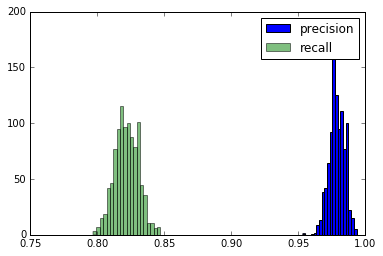

In [38]:
fig, ax = plt.subplots()
ax.hist(precision, 20, label="precision");
ax.hist(recall, 20, alpha=0.5, label="recall");
plt.legend(loc="upper right")
plt.savefig("precision-recall_MC.pdf")

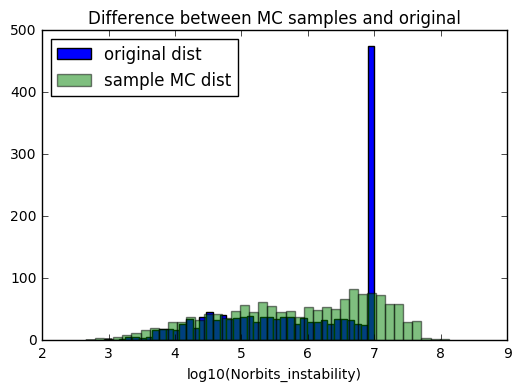

In [154]:
fig, ax = plt.subplots()
ax.hist(np.log10(data["Norbits_instability"]), 40, label="original dist");
ax.hist(data["sample_log_NorbInsta"], 40, alpha=0.5, label="sample MC dist");
plt.legend(loc="upper left")
ax.set_title("Difference between MC samples and original")
ax.set_xlabel("log10(Norbits_instability)")

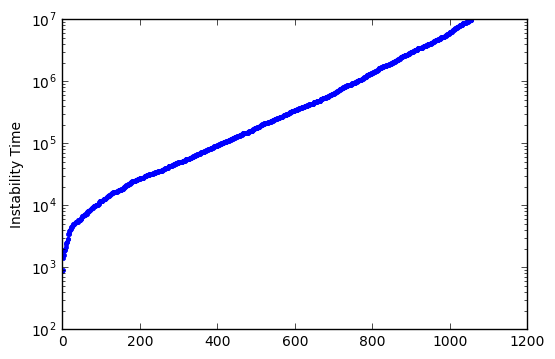

In [78]:
insta_time = data.loc[data["Norbits_instability"]<1e7,"Norbits_instability"]
plt.plot(np.sort(insta_time),'.')
plt.yscale('log')
plt.ylabel('Instability Time')
#plt.savefig("instability-time.pdf")